In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"last.csv")

In [3]:
#data.head()

In [4]:
#data.describe()

In [5]:
#data.dtypes

In [6]:
index_delete = data[data.group == 2].index
print(index_delete)

Int64Index([2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131,
            ...
            3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020],
           dtype='int64', length=899)


In [7]:
data_bin = data.drop(index_delete)

In [8]:
data_bin.head()

,Unnamed: 0,background_max_distance,kernel_max_distance,textures_max_distance,textures_min_distance,barycenter_distance,group
0,0,12.369317,14.142136,22.671568,1.0,10.189276,0
1,1,16.155494,17.204651,31.240999,1.0,13.991094,0
2,2,16.552945,15.297059,30.413813,1.0,13.525940,0
3,3,17.000000,15.132746,29.832868,1.0,12.837341,0
4,4,16.155494,15.811388,30.413813,1.0,13.578361,0


In [9]:
#data_bin.describe()

In [10]:
data_bin = data_bin[600:]

In [11]:
data_bin.shape

(1522, 7)

In [12]:
len(data[data.group == 1].index)

726

In [13]:
from sklearn import model_selection, datasets

In [14]:
X = data_bin[["background_max_distance", 
              "kernel_max_distance", "textures_max_distance", "barycenter_distance"]]

Y = data_bin["group"]

In [15]:
train_data, test_data, train_labels, test_label = model_selection.train_test_split(X, Y, 
                                                                                     test_size = 0.3)

In [16]:
#убедимся, что тестовая выборка действительно составляет 0.3 от всех данных
float(len(test_label))/len(X)

0.3002628120893561

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# y = data_bin.group

# features = ["background_max_distance", "kernel_max_distance", "textures_max_distance", "barycenter_distance"]
# X = data_bin[features]
# X_test = data_bin[features]

## RandomForestClassifier

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [30]:
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
skf = StratifiedKFold(n_splits=3, shuffle=False)
X=data_bin.drop('group', axis=1)
y=data_bin.group

mean_acc = 0
mean_precision = 0
mean_recall = 0
k = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    mean_acc += model.score(X_test, y_test)
    mean_precision += tp / (tp + fp)
    mean_recall += tp / (tp + fn)
    
    
#     s = 0
#     for i in range(y_test.shape[0]):
#         if y_test[i] == predictions[i]:
#             s += 1
    k += 1
    
if k != 0:
    print(mean_acc / 3)
    print(k)
    print(mean_precision / k)
    print(mean_recall / k)

0.8397267649236153
3
0.8835125448028673
0.8429752066115702


$$\operatorname{accuracy}(a, X)=\frac{1}{\ell} \sum_{i=1}^{\ell}\left[a\left(x_{i}\right)=y_{i}\right] $$

Первая метрика, точность (precision), показывает, насколько можно доверять классификатору в случае срабатывания:

$$
\operatorname{precision}(a, X)=\frac{T P}{T P+F P}
$$

Вторая метрика, полнота (recall), показывает, на какой доле истинных объектов первого класса алгоритм
срабатывает:

$$
\operatorname{recall}(a, X)=\frac{T P}{T P+F N}
$$

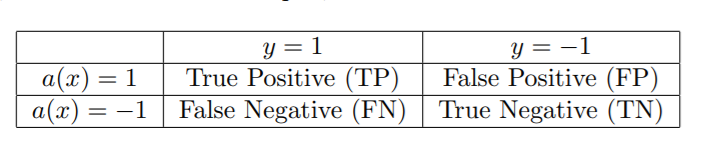

In [21]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y, predictions)
# tn, fp, fn, tp = cm.ravel()
# cm_display = ConfusionMatrixDisplay(cm).plot()
# print(f"accuracy = {s / y.shape[0]}")
# print(f"precision = {tp / (tp + fp)}")
# print(f"recall = {tp / (tp + fn)}")

## Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
skf = StratifiedKFold(n_splits=2, shuffle=False)

X=data_bin.drop('group', axis=1)
y=data_bin.group

mean_acc = 0
mean_precision = 0
mean_recall = 0
k = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    logreg.fit(X_train, y_train)
    predictions = logreg.predict(X_test)
    
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    mean_acc +=  logreg.score(X_test, y_test)
    mean_precision += tp / (tp + fp)
    mean_recall += tp / (tp + fn)
    
    
#     s = 0
#     for i in range(y_test.shape[0]):
#         if y_test[i] == predictions[i]:
#             s += 1
    k += 1
    
if k != 0:
    print(mean_acc / k)
    print(k)
    print(mean_precision / k)
    print(mean_recall / k)

0.6681997371879107
2
0.8018394648829432
0.6308539944903582


In [24]:
# print(f"Доля правильных ответов (accuracy) = {acc_log}")
# cm = confusion_matrix(y, Y_pred)
# tn, fp, fn, tp = cm.ravel()
# cm_display = ConfusionMatrixDisplay(cm).plot()
# print(f"precision = {tp / (tp + fp)}")
# print(f"recall = {tp / (tp + fn)}")

## Gradient boosting classifier

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model_XGBC = XGBClassifier()

param_grid_XGBC = {
    'XGBC_model__eval_metric': ['error'],
    'XGBC_model__objective': ['binary:logistic'],
    'XGBC_model__tree_method': ['gpu_hist'],
    'XGBC_model__n_estimators': [100], #[50, 100, 250, 350]
    'XGBC_model__learning_rate': [0.1], #[0.03, 0.1, 0.3, 0.6] 
    'XGBC_model__max_depth': [6], #[6, 9]
    'XGBC_model__min_child_weight': [2], #[1, 2, 3] 
    'XGBC_model__reg_alpha': [1], #[0.03, 1, 3]
    'XGBC_model__reg_lambda': [0.01], #[0.003, 0.01, 0.03, 0.1] 
    'XGBC_model__random_state': [10],
}

searchCV_XGBC = GridSearchCV(X, param_grid=param_grid_XGBC,
                             cv=5, scoring='accuracy',n_jobs=-1)

## k-Nearest Neighbors algorithm

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors = 5)
skf = StratifiedKFold(n_splits=2, shuffle=False)

X=data_bin.drop('group', axis=1)
y=data_bin.group

mean_acc = 0
mean_precision = 0
mean_recall = 0
k = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    predictions = logreg.predict(X_test)
    
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    mean_acc +=  knn.score(X_test, y_test)
    mean_precision += tp / (tp + fp)
    mean_recall += tp / (tp + fn)
    
    
#     s = 0
#     for i in range(y_test.shape[0]):
#         if y_test[i] == predictions[i]:
#             s += 1
    k += 1
    
if k != 0:
    print(mean_acc / k)
    print(k)
    print(mean_precision / k)
    print(mean_recall / k)

0.7411300919842313
2
0.7990922121356905
0.9958677685950413


## Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=2, shuffle=False)

X=data_bin.drop('group', axis=1)
y=data_bin.group

mean_acc = 0
mean_precision = 0
mean_recall = 0
k = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    decision_tree.fit(X_train, y_train)
    predictions = decision_tree.predict(X_test)
    
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    mean_acc +=  decision_tree.score(X_test, y_test)
    mean_precision += tp / (tp + fp)
    mean_recall += tp / (tp + fn)
    
    
#     s = 0
#     for i in range(y_test.shape[0]):
#         if y_test[i] == predictions[i]:
#             s += 1
    k += 1
    
if k != 0:
    print(mean_acc * 100 / k)
    print(k)
    print(mean_precision * 100 / k)
    print(mean_recall * 100 / k)

74.0473061760841
2
81.84210526315789
74.10468319559229


## Naive Bayes classifiers

In [37]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
skf = StratifiedKFold(n_splits=2, shuffle=False)

X=data_bin.drop('group', axis=1)
y=data_bin.group

mean_acc = 0
mean_precision = 0
mean_recall = 0
k = 0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gaussian.fit(X_train, y_train)
    predictions = gaussian.predict(X_test)
    
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    mean_acc +=  gaussian.score(X_test, y_test)
    mean_precision += tp / (tp + fp)
    mean_recall += tp / (tp + fn)
    
    
#     s = 0
#     for i in range(y_test.shape[0]):
#         if y_test[i] == predictions[i]:
#             s += 1
    k += 1
    
if k != 0:
    print(mean_acc / k)
    print(k)
    print(mean_precision / k)
    print(mean_recall / k)

0.942838370565046
2
0.9653846153846154
0.9173553719008265


NameError: name 'Y_train' is not defined